# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Drew\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


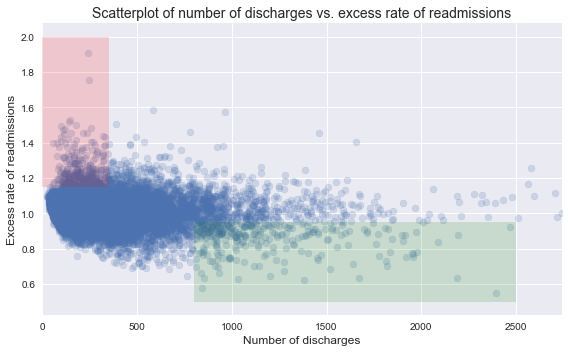

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

A. Are the rates declining with more discharges due to a skew in the data? 

In order to look at this, I will look at a histogram of the data as well as a box and whisker plot.

C:\Users\Drew\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


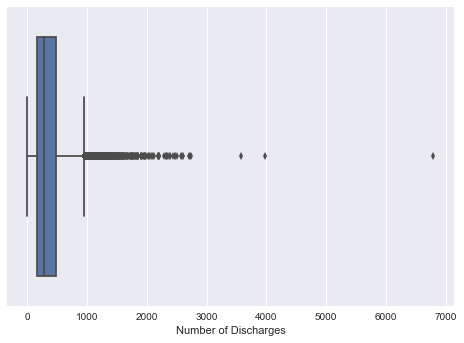

In [6]:
sns.set()
sns.boxplot(clean_hospital_read_df['Number of Discharges'])
plt.show()

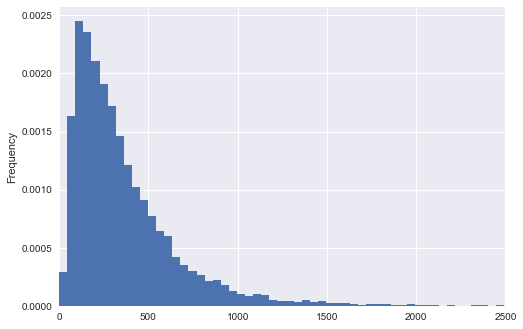

In [7]:
_ = clean_hospital_read_df['Number of Discharges'].plot(kind='hist', bins=150, normed=True, xlim=(0,2500))

The data is strongly skewed right, so the median value is less than the mean of the samples. 

In [8]:
clean_hospital_read_df['Number of Discharges'].describe()

count    11578.000000
mean       362.909397
std        309.176945
min          0.000000
25%        157.000000
50%        280.000000
75%        472.750000
max       6793.000000
Name: Number of Discharges, dtype: float64

In [9]:
print(clean_hospital_read_df['Number of Discharges'].quantile([.96]))
print(clean_hospital_read_df['Number of Discharges'].quantile([.11]))

0.96    999.84
Name: Number of Discharges, dtype: float64
0.11    100.0
Name: Number of Discharges, dtype: float64


The two groups that the analysis looks at only covers 15% of the dataset, so even if their findings were true (they do not provide any hypothesis testing results to corroborate their statements), they are not representative of the entire dataset. I am going to compare the performance of two groups taken from the entire population. The demarcation will be hospitals with >300 discharges and those with =<300 discharges. The null hypothesis is that there is no difference. The alternate hypothesis is that hospitals with fewer discharges have higher Excess Readmission Ratios

In [10]:
new = clean_hospital_read_df.loc[:, ['Number of Discharges','Excess Readmission Ratio']]
new = new.dropna()

In [11]:
mu = 0
small = new[new['Number of Discharges'] <= 300]
large = new[new['Number of Discharges'] > 300]

In [12]:
small_perc = len(small[small['Excess Readmission Ratio'] > 1.0])/len(small)
large_perc = len(large[large['Excess Readmission Ratio'] > 1.0])/len(large)
print('Percentage of Small Hospitals with Excess Readmission Ratio > 1.0: %.1f' % (small_perc*100))
print('Percentage of Large Hospitals with Excess Readmission Ratio > 1.0: %.1f' % (large_perc*100))

Percentage of Small Hospitals with Excess Readmission Ratio > 1.0: 53.8
Percentage of Large Hospitals with Excess Readmission Ratio > 1.0: 49.2


In [13]:
xbar = small['Excess Readmission Ratio'].mean() - large['Excess Readmission Ratio'].mean()
small_std = small['Excess Readmission Ratio'].std()
large_std = large['Excess Readmission Ratio'].std()
sample_var = (small_std**2)/len(small) + (large_std**2)/len(large)
sample_se = np.sqrt(sample_var)

In [14]:
upper = mu + 1.96*sample_se
lower = mu - 1.96*sample_se
print('95%% Confidence Interval: [%.3f, %.3f]' % (lower, upper))
print('Sample Mean: %.3f' % xbar)

95% Confidence Interval: [-0.003, 0.003]
Sample Mean: 0.014


In [15]:
z = (xbar - mu)/sample_se
z

8.3345070444944014

In [16]:
p = 1 - stats.norm.cdf(z)
p

0.0

The p-value was found to be 0 which means that the probability of the observed difference in means between small and large hospitals is significant. It is safe to conclude that larger hospitals do have a lower Excess Readmission Ratio than hospitals with fewer discharges.

In [17]:
clean_hospital_read_df['Number of Discharges'].max()

6793

In [18]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [19]:
# Test conclusions about small and large hospitals
small_hosp = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
large_hosp = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]

In [20]:
# Null Hypothesis: There is no difference between the mean excess readmission ratio for small and large hospitals
# Alternate Hypothesis: There is a difference between mean excess readmission ratio for small and large hopitals
# If there is no difference then the mean of the sample = mean of small hospitals


small = small_hosp['Excess Readmission Ratio']
large = large_hosp['Excess Readmission Ratio']

mu = 0
sample_mean = small.mean() - large.mean()
sample_var = small.std()**2/len(small) + large.std()**2/len(large)
sample_std = np.sqrt(sample_var)
sample_se = np.sqrt(small.std()**2/len(small) + large.std()**2/len(large))
# Calculate confidence interval
upper_lim = mu + 1.96*sample_se
lower_lim = mu - 1.96*sample_se
print('95%% Confidence Interval: [%.3f, %.3f], Standard Error: %.3f' % (lower_lim, upper_lim, sample_se))

95% Confidence Interval: [-0.011, 0.011], Standard Error: 0.006


In [21]:
z = (sample_mean - mu) / sample_se
z

7.6220527514750032

In [22]:
p = 1 - stats.norm.cdf(z)
print('p-value: %f' % p)

p-value: 0.000000


The p-value for this hypothesis test is 0, so the likelihood of producing a sample with the measured difference in means is so unlikely as to be practically impossible. We can conclude that there is a significant difference in the Excess Readmission Ratio in hospitals with <100 discharges and those with >1000 discharges.

In [23]:
# Look at the correlation between discharges and Excess Readmission Ratio
a = clean_hospital_read_df.loc[:, ['Number of Discharges', 'Excess Readmission Ratio']]
a = a.dropna()
m, b = np.polyfit(a['Number of Discharges'], a['Excess Readmission Ratio'], 1)

In [24]:
x = a['Number of Discharges'].sort_values()
y_exp = m*x+b


In [25]:
stats.chisquare(a['Excess Readmission Ratio'], y_exp)

Power_divergenceResult(statistic=95.827079185032488, pvalue=1.0)